Step 1: Install Dependencies


In [1]:
# Install required libraries
!pip install pandas numpy seaborn scikit-learn imbalanced-learn xgboost matplotlib


Step 2: Import Libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier

Step 3: Load Dataset


In [3]:
file_path = '/content/drive/My Drive/Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Telco-Customer-Churn.csv'

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
# checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Convert target 'Churn' to 0/1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Drop low-impact columns as per paper
df_reduced = df.drop(['gender', 'SeniorCitizen', 'Dependents', 'customerID'], axis=1)

# One-hot encode categorical features except target
cat_cols = df_reduced.select_dtypes(include=['object']).columns.tolist()
data_encoded = pd.get_dummies(df_reduced, columns=cat_cols, drop_first=True)

print("Shape after encoding:", data_encoded.shape)
display(data_encoded.head())

Shape after encoding: (7043, 6557)


,tenure,MonthlyCharges,Churn,Partner_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,1,29.85,0,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,34,56.95,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,53.85,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,45,42.30,0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,70.70,1,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


Step 4: Data Cleaning

In [ ]:
# Check  missing values
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Check  missing values
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# check duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
# describe the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370
std,0.368612,24.559481,30.090047,0.441561
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.850000,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [ ]:
# Data cleaning
df.drop(['customerID'], axis=1)
df.dropna()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [ ]:
# Convert TotalCharges to numeric (some values are empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Drop rows with NaN values that resulted from the conversion
df.dropna(inplace=True)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [ ]:
file_path = '/content/drive/My Drive/Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

# Convert TotalCharges to numeric (some values are empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with NaN values that resulted from the conversion
df.dropna(inplace=True)

print("Shape after loading and dropping NaNs:", df.shape)
display(df.head())

Shape after loading and dropping NaNs: (7032, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Step 5: Feature Reduction (Attribute Selection)

In [ ]:
df.describe(include ='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


In [ ]:
# Convert target 'Churn' to 0/1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Drop low-impact columns as per paper and customerID
df_reduced = df.drop(['gender', 'SeniorCitizen', 'Dependents', 'customerID'], axis=1)

# One-hot encode categorical features except target
cat_cols = df_reduced.select_dtypes(include=['object']).columns.tolist()
data_encoded = pd.get_dummies(df_reduced, columns=cat_cols, drop_first=True)

print("Shape after encoding:", data_encoded.shape)
display(data_encoded.head())

Shape after encoding: (7032, 28)


,tenure,MonthlyCharges,TotalCharges,Churn,Partner_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,0,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,1,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,0,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,1,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


Step 6: Split Features & Target + Scaling

In [ ]:
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

print("Feature matrix shape:", X.shape)
print("Target distribution:\n", y.value_counts())

Feature matrix shape: (7032, 27)
Target distribution:
 Churn
0    5163
1    1869
Name: count, dtype: int64


Step 7: Handle Imbalanced Data (SMOTE + ENN)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN
import numpy as np

smote = SMOTE(random_state=42)
enn = EditedNearestNeighbours()
sme = SMOTEENN(smote=smote, enn=enn)

X_bal, y_bal = sme.fit_resample(X_train_scaled, y_train)

print("Class distribution after balancing:", np.bincount(y_bal))

Class distribution after balancing: [4130 2611]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features (only fit on training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training feature matrix shape:", X_train_scaled.shape)
print("Testing feature matrix shape:", X_test_scaled.shape)
print("Training target distribution:\n", y_train.value_counts())
print("Testing target distribution:\n", y_test.value_counts())

Training feature matrix shape: (5625, 27)
Testing feature matrix shape: (1407, 27)
Training target distribution:
 Churn
0    4130
1    1495
Name: count, dtype: int64
Testing target distribution:
 Churn
0    1033
1     374
Name: count, dtype: int64


Step 8: Split balanced data into train-test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (5392, 27)
Test shape: (1349, 27)


Step 9: Define and train multiple models; evaluate performance

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SGD Classifier": SGDClassifier(max_iter=1000),
    "Gaussian NB": GaussianNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Bagging": BaggingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       821
           1       0.76      0.83      0.79       528

    accuracy                           0.83      1349
   macro avg       0.82      0.83      0.83      1349
weighted avg       0.83      0.83      0.83      1349


=== SGD Classifier ===
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       821
           1       0.75      0.78      0.76       528

    accuracy                           0.81      1349
   macro avg       0.80      0.80      0.80      1349
weighted avg       0.81      0.81      0.81      1349


=== Gaussian NB ===
              precision    recall  f1-score   support

           0       0.95      0.58      0.72       821
           1       0.59      0.95      0.73       528

    accuracy                           0.73      1349
   macro avg       0.77      0.77      0.73      1349


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:37:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       821
           1       0.87      0.90      0.88       528

    accuracy                           0.91      1349
   macro avg       0.90      0.90      0.90      1349
weighted avg       0.91      0.91      0.91      1349



Step 10: Compare model results

In [ ]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print(results_df.sort_values(by="Accuracy", ascending=False))


                 Model  Accuracy  Precision    Recall  F1 Score
6        Random Forest  0.913269   0.881262  0.899621  0.890347
8              XGBoost  0.905856   0.866545  0.897727  0.881860
7              Bagging  0.875463   0.846154  0.833333  0.839695
5        Decision Tree  0.860638   0.809091  0.842803  0.825603
4                  KNN  0.851001   0.755869  0.914773  0.827763
3                  SVM  0.848777   0.783217  0.848485  0.814545
0  Logistic Regression  0.830986   0.762238  0.825758  0.792727
1       SGD Classifier  0.810971   0.749543  0.776515  0.762791
2          Gaussian NB  0.726464   0.594306  0.948864  0.730853


Bar Charts Comparing Models by Metrics

/tmp/ipython-input-3578196168.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y="Model", data=results_df, palette="coolwarm")
/tmp/ipython-input-3578196168.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y="Model", data=results_df, palette="coolwarm")
/tmp/ipython-input-3578196168.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y="Model", data=results_df, palette="coolwarm")
/tmp/ipython-input-3578196168.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

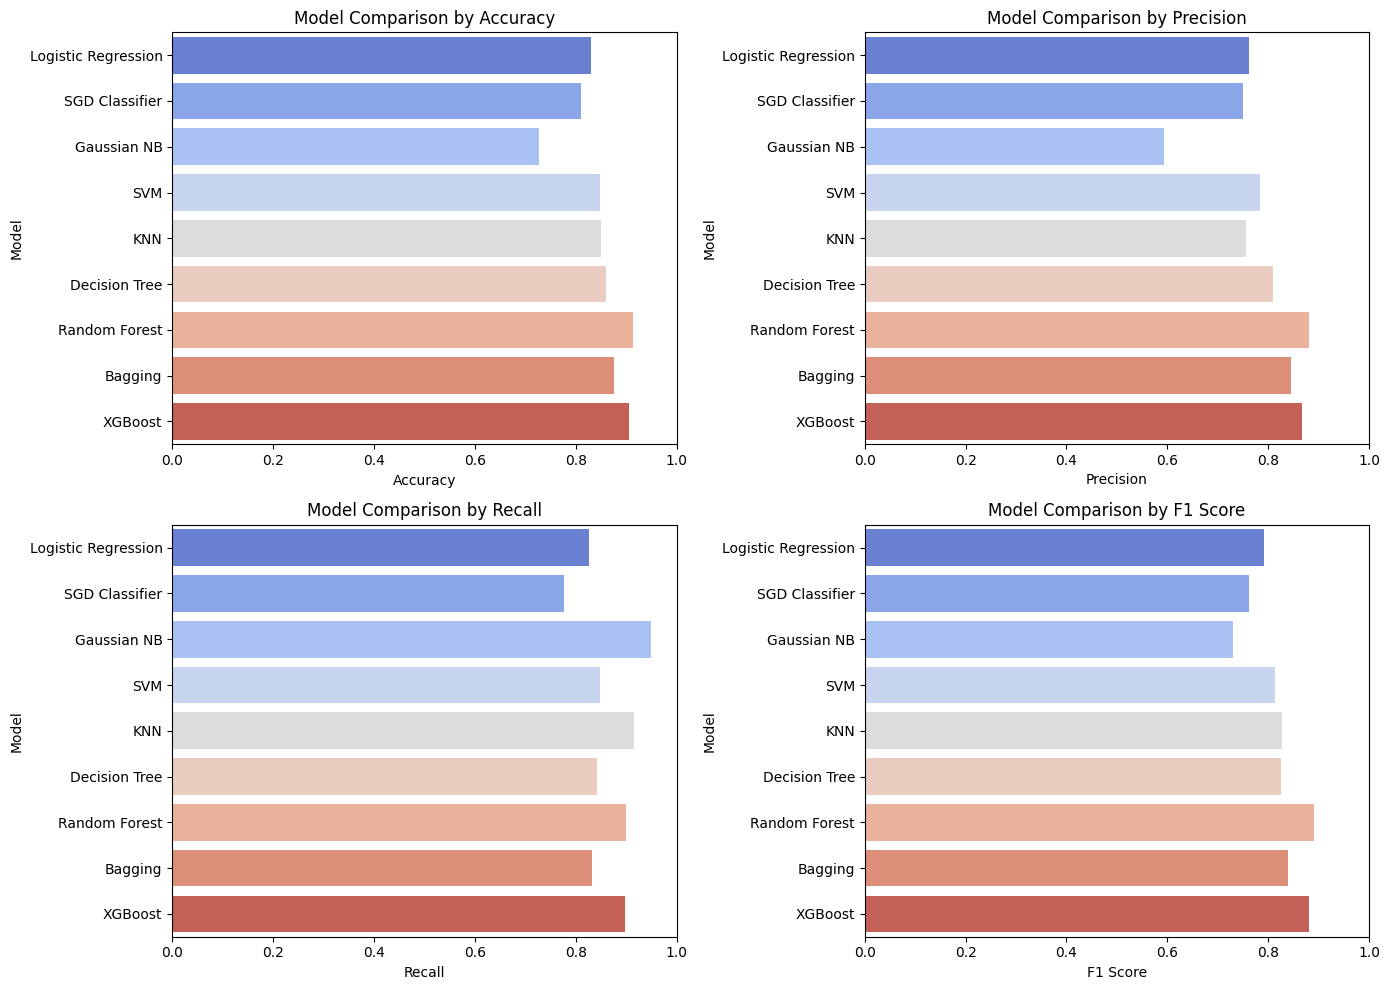

In [ ]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=metric, y="Model", data=results_df, palette="coolwarm")
    plt.title(f'Model Comparison by {metric}')
    plt.xlim(0, 1)
plt.tight_layout()
plt.show()


Line Chart of Accuracy by Model

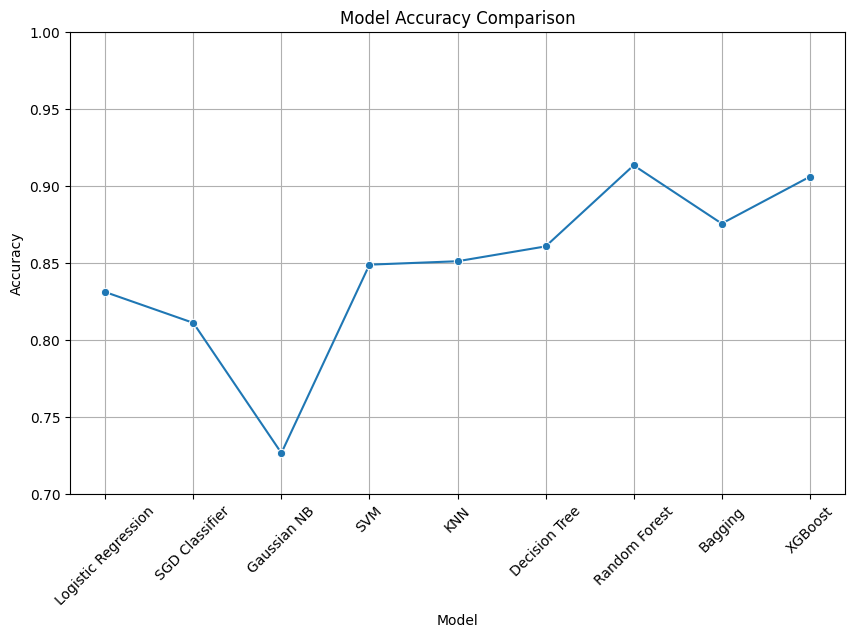

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x="Model", y="Accuracy", marker='o')
plt.ylim(0.7, 1)
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.grid(True)
plt.show()


Model Accuracy Comparison:
                 Model  Accuracy
6        Random Forest  0.913269
8              XGBoost  0.905856
7              Bagging  0.875463
5        Decision Tree  0.860638
4                  KNN  0.851001
3                  SVM  0.848777
0  Logistic Regression  0.830986
1       SGD Classifier  0.810971
2          Gaussian NB  0.726464


/tmp/ipython-input-1531075603.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=accuracy_df, palette='viridis')


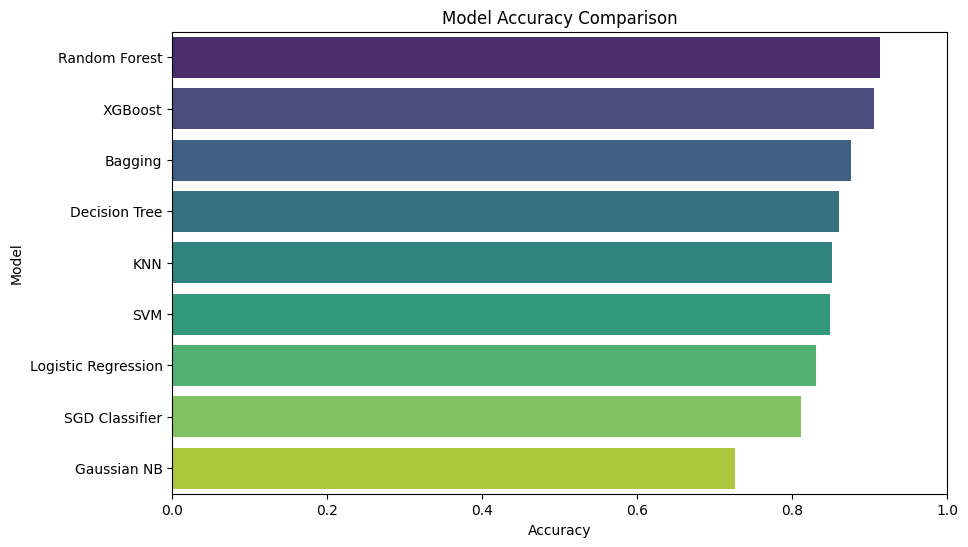

In [ ]:
# Extract accuracy values only
accuracy_results = [(name, acc) for name, acc, _, _, _ in results]

# Create DataFrame for accuracy only
accuracy_df = pd.DataFrame(accuracy_results, columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)

# Display accuracy table
print("Model Accuracy Comparison:")
print(accuracy_df)

# Plot accuracies as bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=accuracy_df, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
plt.show()
